# Workflow 3 - cluster the trajectory

**Input:** EnGen object featurized with reduced dimensionality (generated by Workflow2)


**Output:** Representative trajectory ensemble  
<hr>
Steps:

1. Import the featurized trajectory from Workflow2
2. Choose clustering technique: KMeans, Gaussian Mixture Models
3. Choose appropriate parameters for clustering (number of clusters)
4. Additionally filter trajectories
5. Extract the ensemble

In [1]:
#required imports

from engens.core.EnGens import EnGen
from engens.core.ClustEn import *
import pickle as pk

### Step 0 - Load data from Workflow2

In [2]:
engen = None
with open("wf2_resulting_EnGen.pickle", "rb") as file:
    engen = pk.load(file)

In [3]:
traj = engen.traj
ref = engen.ref
print("Using the trajectory {} and reference pdb file {}".format(traj, ref))

topology = engen.mdtrajref
print("The topology is:")
print(topology)

frame_num = engen.data[engen.chosen_feat_index][1].shape[0]
print("Number of frames is {}".format(frame_num))

feat_dims = engen.data[engen.chosen_feat_index][1].shape[1]
print("The dimensionality of your featurization is {}".format(feat_dims))

feat = engen.featurizers[engen.chosen_feat_index]
print("You chose to featurize with")
print(feat.describe())

dimred_data = engen.dimred_data
print("After dimensionality reduction the dimension of your features is {}".format(dimred_data.shape[1]))


Using the trajectory ./pentapeptide-00-500ns-impl-solv.xtc and reference pdb file ./pentapeptide-impl-solv.pdb
The topology is:
<mdtraj.Topology with 1 chains, 5 residues, 94 atoms, 95 bonds>
Number of frames is 5001
The dimensionality of your featurization is 16
You chose to featurize with
['COS(PHI 0 LEU 2)', 'SIN(PHI 0 LEU 2)', 'COS(PSI 0 TRP 1)', 'SIN(PSI 0 TRP 1)', 'COS(PHI 0 ALA 3)', 'SIN(PHI 0 ALA 3)', 'COS(PSI 0 LEU 2)', 'SIN(PSI 0 LEU 2)', 'COS(PHI 0 LEU 4)', 'SIN(PHI 0 LEU 4)', 'COS(PSI 0 ALA 3)', 'SIN(PSI 0 ALA 3)', 'COS(PHI 0 LEU 5)', 'SIN(PHI 0 LEU 5)', 'COS(PSI 0 LEU 4)', 'SIN(PSI 0 LEU 4)']
After dimensionality reduction the dimension of your features is 3


### Step 1 - choose the clustering method

In [4]:
#------------two clustering algorithms------------------#
#----------------choose and uncomment one----------------#
# Option 1 - choose Kmeans

clustering = "KM"
cluster_method = clusterings[clustering](engen)

# Option 2 - choose GMMs
"""
clustering = "GMM" 
cluster_method = clusterings[clustering](engen)
"""

'\nclustering = "GMM" \ncluster_method = clusterings[clustering](engen)\n'

### Step 2 - run the clustering with different parameters

Clustering with params={'n_clusters': 2}
Clustering with params={'n_clusters': 3}
Clustering with params={'n_clusters': 4}
Clustering with params={'n_clusters': 5}
Clustering with params={'n_clusters': 6}
Clustering with params={'n_clusters': 7}
Clustering with params={'n_clusters': 8}
Clustering with params={'n_clusters': 9}


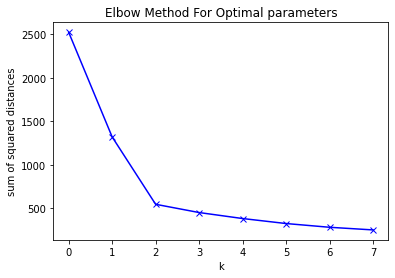

Optimal index=7
Optimal params={'n_clusters': 9}


7

In [5]:
# Create K clusters

if clustering =="KM":
    params = [{"n_clusters":i} for i in range(2, 10)]
else:
    params = [{"n_components":i} for i in range(2, 10)]
cluster_method.cluster_multiple_params(params)

# analyze these parameters with the elbow method
cluster_method.analyze_elbow_method()

Best parameter index from silhouette analysis are 0
Best parameters from silhouette analysis are {'n_clusters': 2}


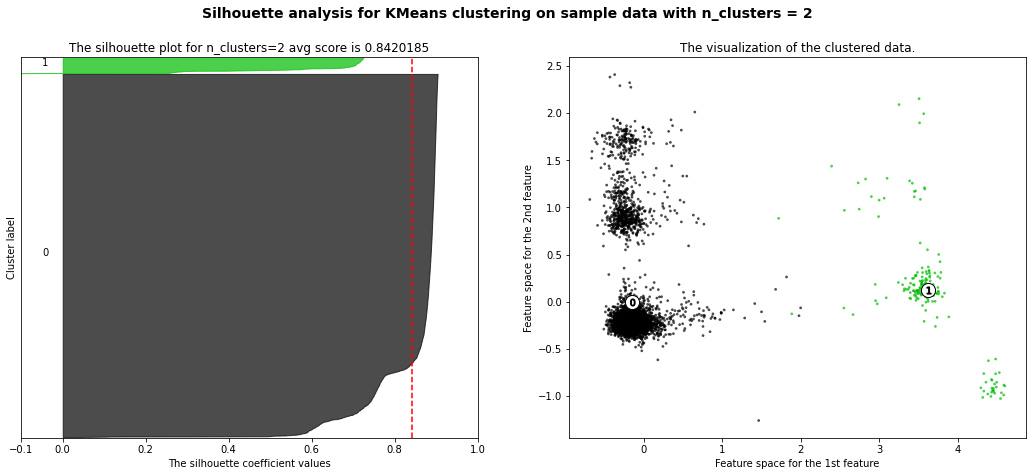

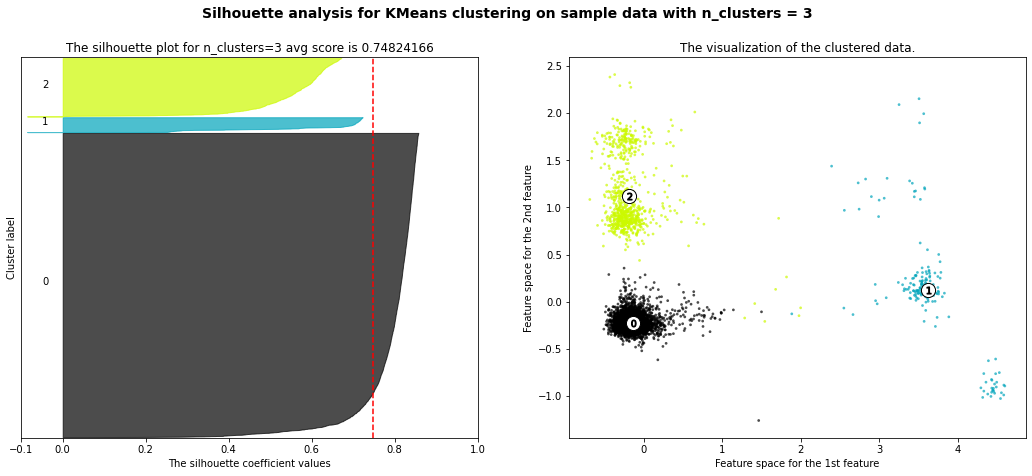

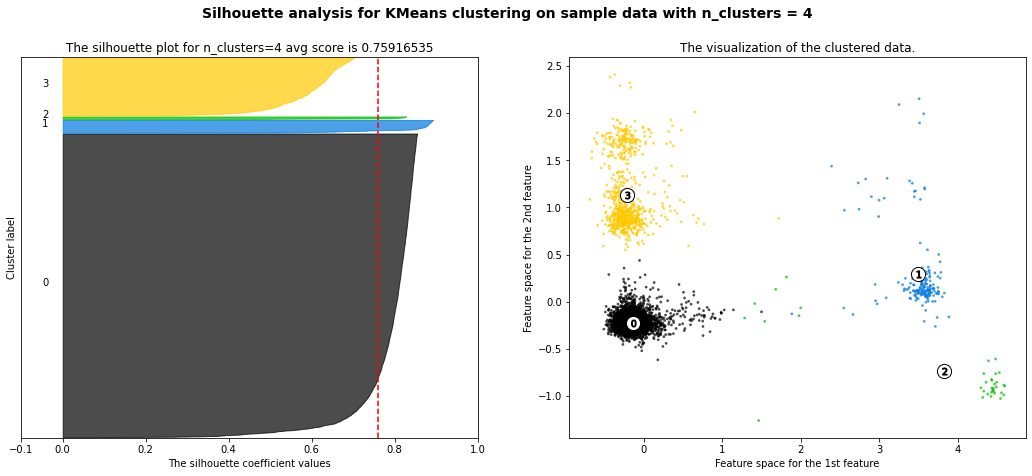

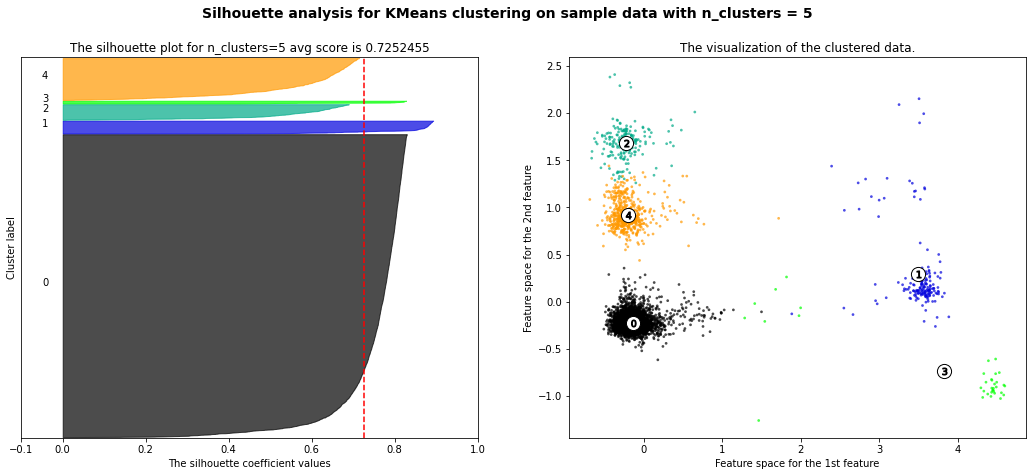

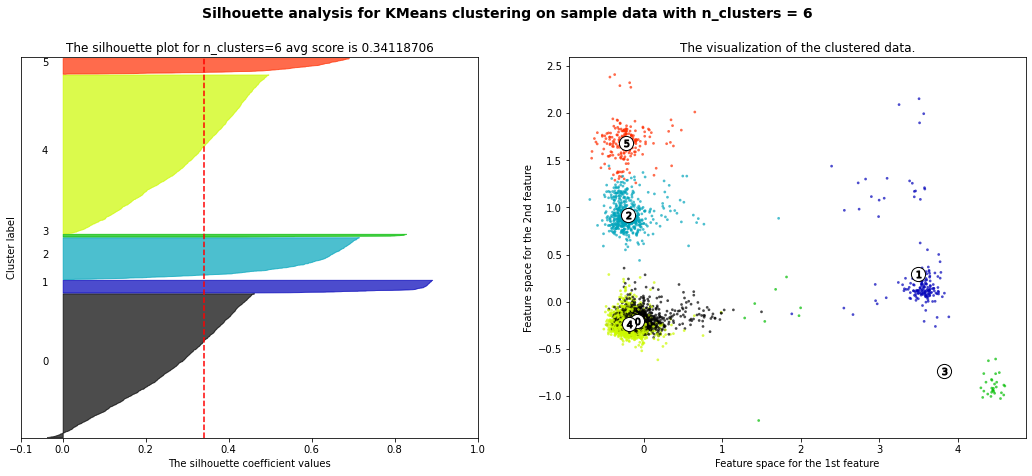

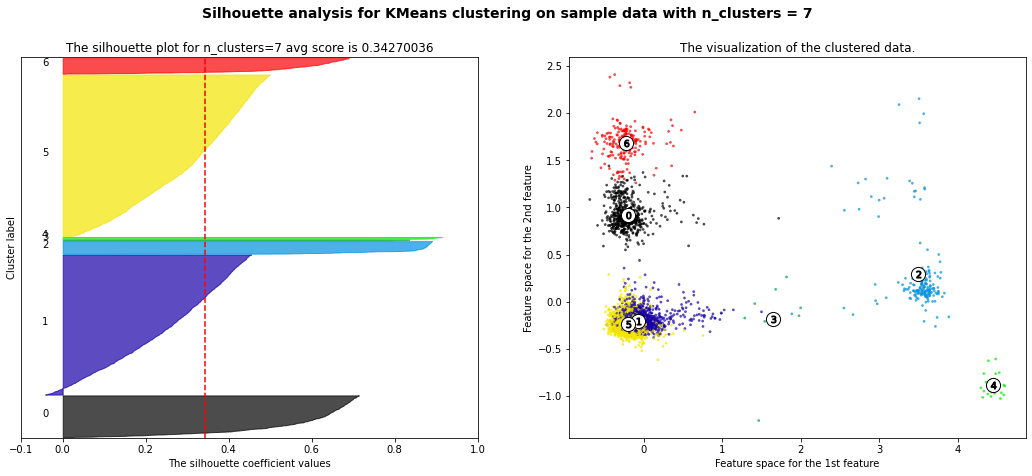

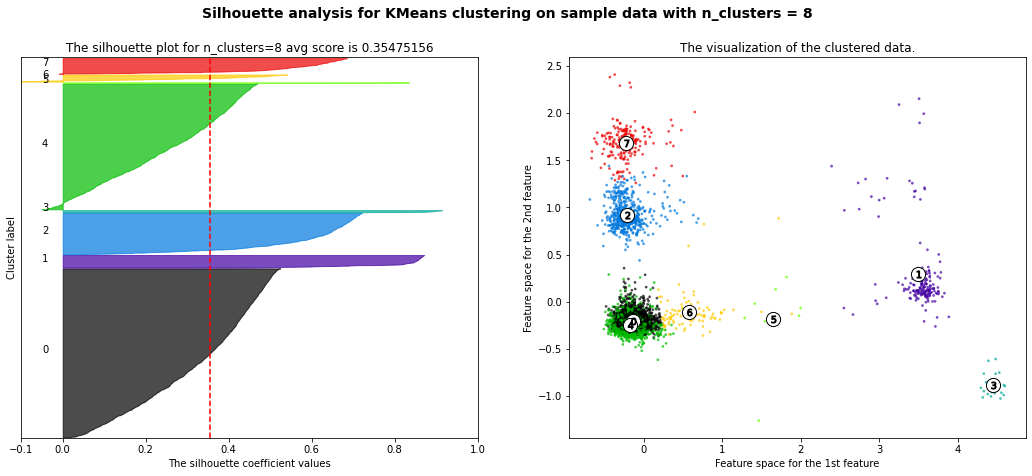

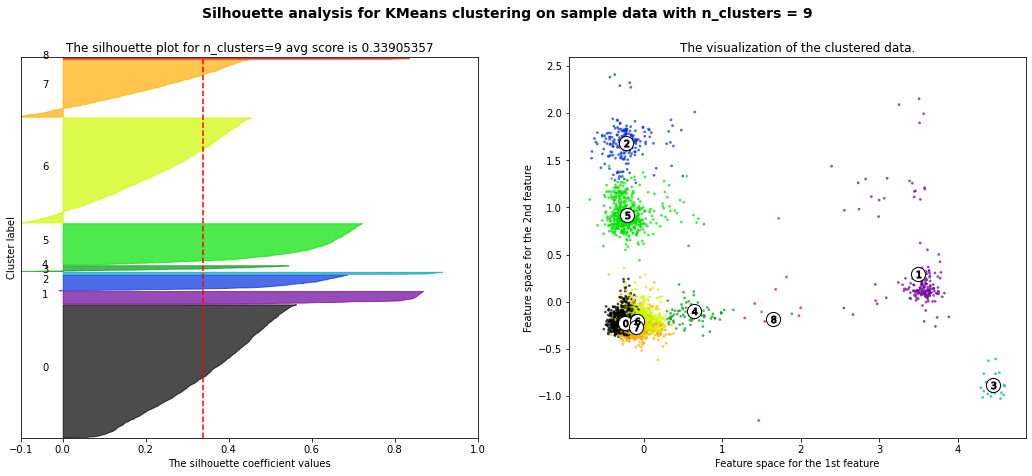

In [6]:
# analyze these parameters with the silhouette method
cluster_method.analyze_silhouette()

In [7]:
# pick the parameter index
param_index = 1

cluster_method.choose_param(param_index)

### Step 3 - optionally pick a subset of clusters with the heighest weight

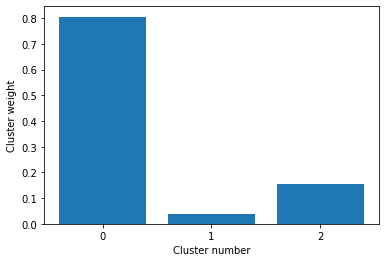

In [8]:
cluster_method.plot_cluster_weight()

Chosen cluster ids: [0, 2]


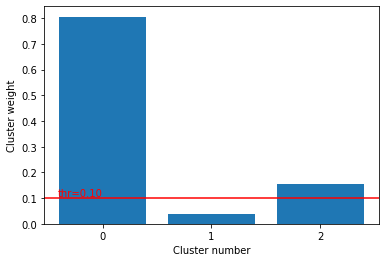

In [9]:
cluster_method.choose_clusters(thr=0.1)

### Step 4 - extract conformations for the ensemble

Chosen centers: [array([-0.14173281, -0.22184172, -0.02457112], dtype=float32), array([-0.1921538 ,  1.1215597 ,  0.18588787], dtype=float32)]
Chosen frames: [1630 3755]
Closest conformation inside cluster 0 frame 1630 of the striped trajectory
Extracting and saving
Closest conformation inside cluster 2 frame 3755 of the striped trajectory
Extracting and saving


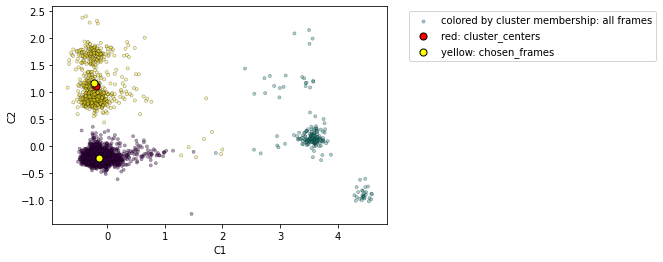

In [10]:
ensemble_location = "./res_ensemble"
cluster_method.choose_conformations()
cluster_method.extract_conformations(ensemble_location)


### Step 5 - save results for analysis

In [11]:
with open("wf3_resulting_EnGen.pickle", "wb") as file:
    pk.dump(engen, file, -1)
    
with open("wf3_resulting_Clust.pickle", "wb") as file:
    pk.dump(cluster_method, file, -1)